In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [63]:
avocados_filepath = "C:/Users/ASUS/Downloads/python/avocadoo/avocado.csv"
avocados_data = pd.read_csv(avocados_filepath,index_col=0, parse_dates=True)

In [64]:
avocados_data.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [65]:
avocados_data=avocados_data.rename(columns={"4046": "SmallHassSold", "4225": "LargeHassSold", "4770" : "ExtraLargeHassSold"})
avocados_data['MostMoney']=avocados_data['AveragePrice']* avocados_data['Total Bags']

In [66]:
sns.set(rc={'figure.figsize':(12,8)})
years = mdates.YearLocator()
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y')
datemin = np.datetime64(pd.to_datetime(avocados_data['Date']).min(), 'Y')
datemax = np.datetime64(pd.to_datetime(avocados_data['Date']).max(), 'Y') + np.timedelta64(3, 'M')

In [67]:
def set_default_locators(ax_subplot):
    ax_subplot.xaxis.set_major_locator(years)
    ax_subplot.xaxis.set_major_formatter(yearsFmt)
    ax_subplot.xaxis.set_minor_locator(months)
    ax_subplot.xaxis.set_minor_formatter(monthsFmt)

[Text(0, 0.5, 'Average Price ,$'), Text(0.5, 0, 'Year')]

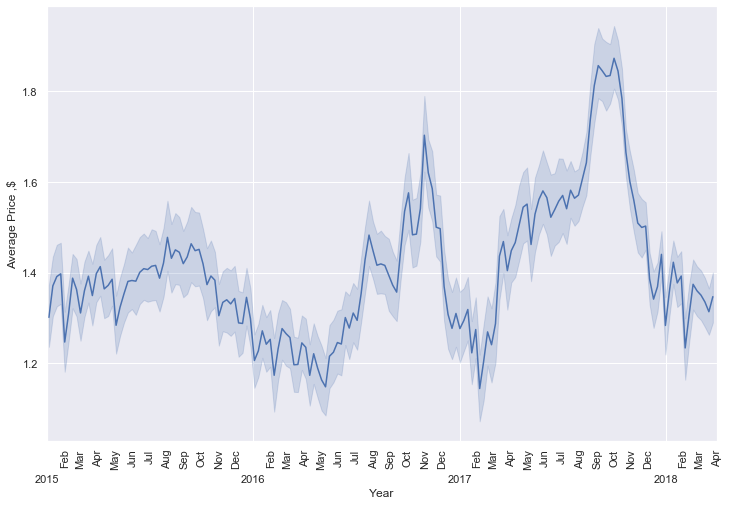

In [68]:
fig, ax = plt.subplots()
sns.lineplot(x=pd.to_datetime(avocados_data['Date']), y=avocados_data['AveragePrice'])

ax.set_xlim(datemin, datemax)
set_default_locators(ax)

plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
plt.rcParams['xtick.bottom'] = True
ax.set(xlabel='Year', ylabel='Average Price ,$')

[Text(0, 0.5, 'Total Bags'), Text(0.5, 0, 'Bags')]

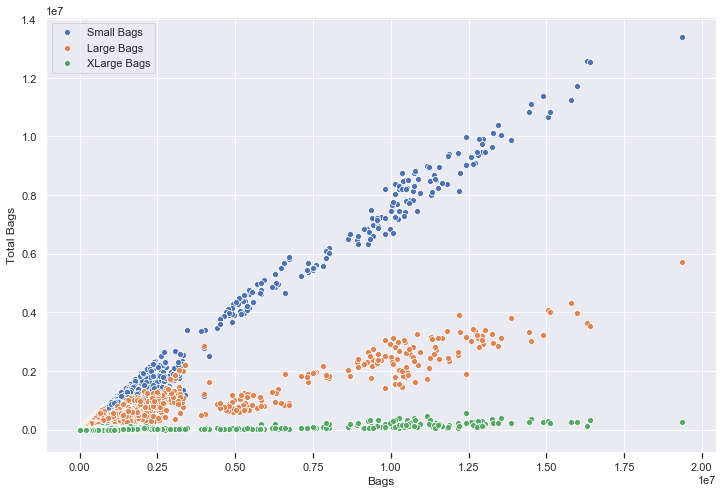

In [69]:
fig1=sns.scatterplot(x=avocados_data['Total Bags'], y=avocados_data['Small Bags'], label= 'Small Bags')
fig1=sns.scatterplot(x=avocados_data['Total Bags'], y=avocados_data['Large Bags'], label= 'Large Bags')
fig1=sns.scatterplot(x=avocados_data['Total Bags'], y=avocados_data['XLarge Bags'], label= 'XLarge Bags')

fig1.set(xlabel='Bags', ylabel='Total Bags')

In [70]:
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
avocados_data['Month']=avocados_data['Date'].apply(lambda date: month_names[int(date.split("-")[1])-1])

In [71]:
avocados_sorted_by_month = avocados_data.sort_values(by=['Month'])
avocados_sorted_by_month.Month = avocados_sorted_by_month.Month.astype("category")
avocados_sorted_by_month.Month.cat.set_categories(month_names, inplace=True)
avocados_sorted_by_month = avocados_sorted_by_month.sort_values(by=['Month'])

[Text(0, 0.5, 'Average Price, $'), Text(0.5, 0, 'Month')]

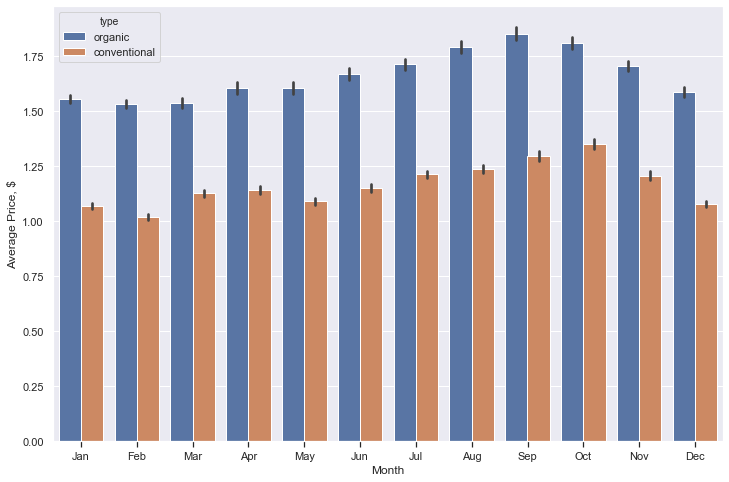

In [72]:
fig2=sns.barplot(x=avocados_sorted_by_month['Month'], y=avocados_sorted_by_month['AveragePrice'], hue =avocados_sorted_by_month['type'])
fig2.set(xlabel='Month', ylabel='Average Price, $')

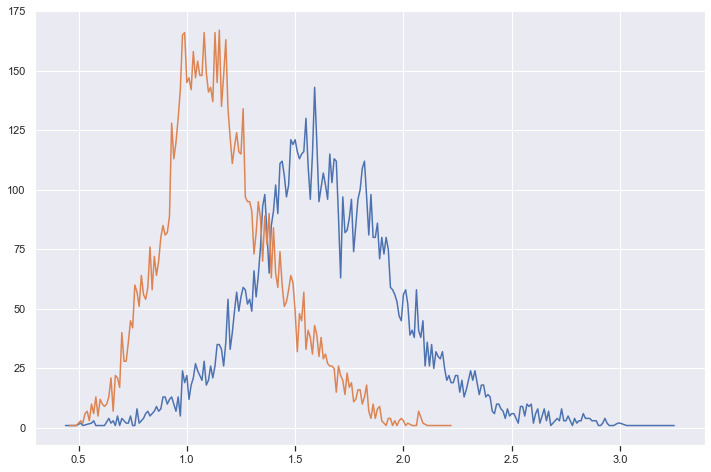

In [73]:
def avocado_dataframe_by_type(avocado_type):
    return avocados_data[avocados_data.type== avocado_type]

avocados_organic= avocado_dataframe_by_type('organic')
avocados_conventional= avocado_dataframe_by_type('conventional')
sns.lineplot(x=avocados_organic['AveragePrice'].value_counts().index, y=avocados_organic['AveragePrice'].value_counts().values)
sns.lineplot(x=avocados_conventional['AveragePrice'].value_counts().index, y=avocados_conventional['AveragePrice'].value_counts().values)

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Average Price, $')]

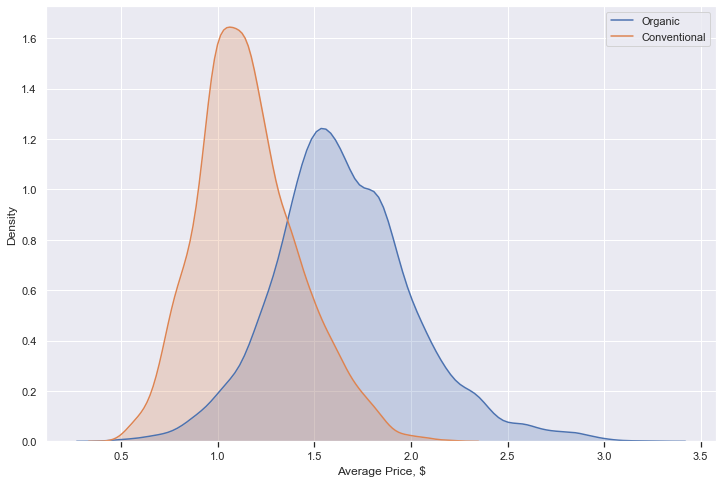

In [74]:
fig3=sns.kdeplot(avocados_organic['AveragePrice'], shade= True, label='Organic')
fig3=sns.kdeplot(avocados_conventional['AveragePrice'], shade= True, label='Conventional')
fig3.set(xlabel='Average Price, $', ylabel='Density')

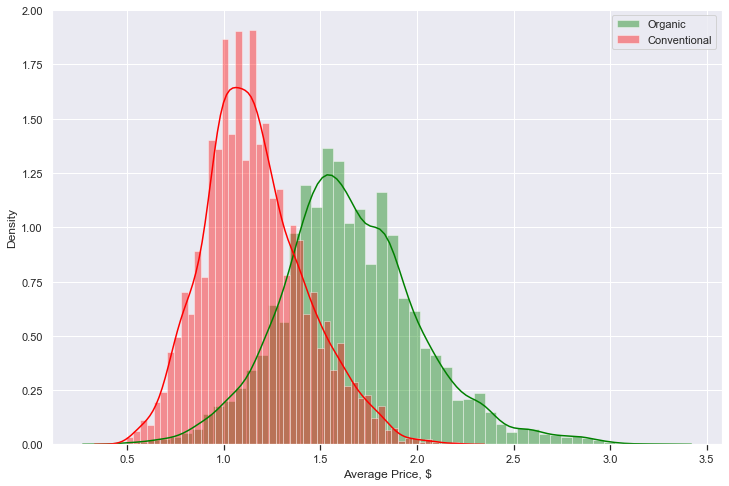

In [75]:
fig4=sns.distplot(avocados_organic['AveragePrice'], label= 'Organic', color ='green')
fig4=sns.distplot(avocados_conventional['AveragePrice'], label= 'Conventional', color= 'red')
fig4.set(xlabel='Average Price, $', ylabel='Density')
plt.legend()

In [76]:
avocado_2015 = avocados_data[avocados_data.Date < '2016-01-01']
avocado_2016 = avocados_data[(avocados_data.Date < '2017-01-01')  & (avocados_data.Date > '2016-01-01') ]
avocado_2017 = avocados_data[(avocados_data.Date < '2018-01-01')  & (avocados_data.Date > '2017-01-01') ]
avocado_2018 = avocados_data[(avocados_data.Date < '2019-01-01')  & (avocados_data.Date > '2018-01-01') ]

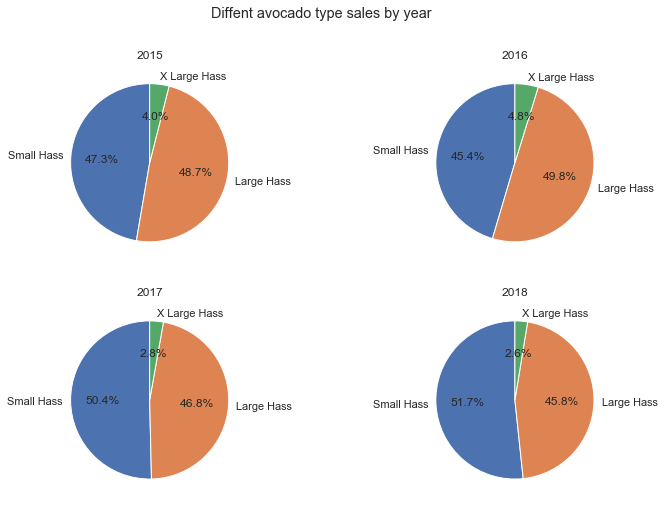

In [77]:
labels = 'Small Hass', 'Large Hass', 'X Large Hass'
fig5, ax5 = plt.subplots(2,2)
ax5[0,0].pie([avocado_2015.SmallHassSold.sum(), avocado_2015.LargeHassSold.sum(),avocado_2015.ExtraLargeHassSold.sum()],  labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax5[0,1].pie([avocado_2016.SmallHassSold.sum(), avocado_2016.LargeHassSold.sum(),avocado_2016.ExtraLargeHassSold.sum()],  labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax5[1,0].pie([avocado_2017.SmallHassSold.sum(), avocado_2017.LargeHassSold.sum(),avocado_2017.ExtraLargeHassSold.sum()],  labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax5[1,1].pie([avocado_2018.SmallHassSold.sum(), avocado_2018.LargeHassSold.sum(),avocado_2018.ExtraLargeHassSold.sum()],  labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax5[0,0].set(aspect="equal", title='2015')
ax5[0,1].set(aspect="equal", title='2016')
ax5[1,0].set(aspect="equal", title='2017')
ax5[1,1].set(aspect="equal", title='2018')

st = fig5.suptitle('Diffent avocado type sales by year')

[Text(0, 0.5, 'City'), Text(0.5, 0, 'Average Price, $')]

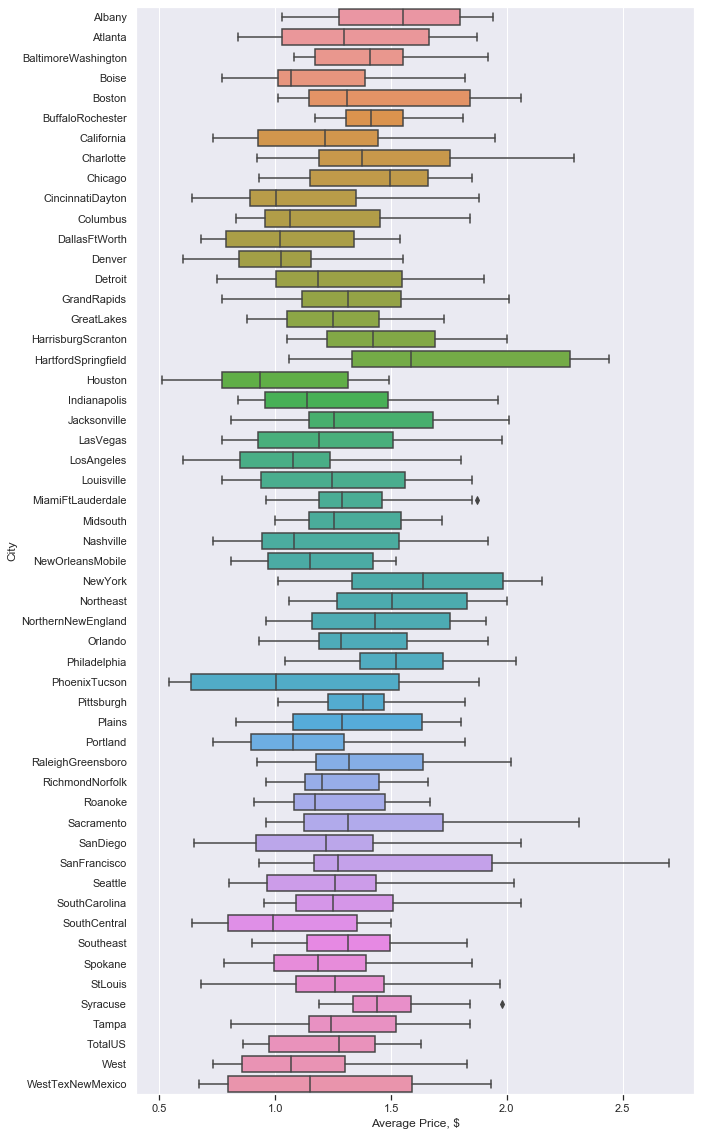

In [78]:
avocados_january= avocados_data[avocados_data.Month =='Jan']
plt.figure(figsize=(10,20))
fig6=sns.boxplot(x=avocados_january['AveragePrice'], y=avocados_january['region'])
fig6.set(xlabel='Average Price, $', ylabel='City')

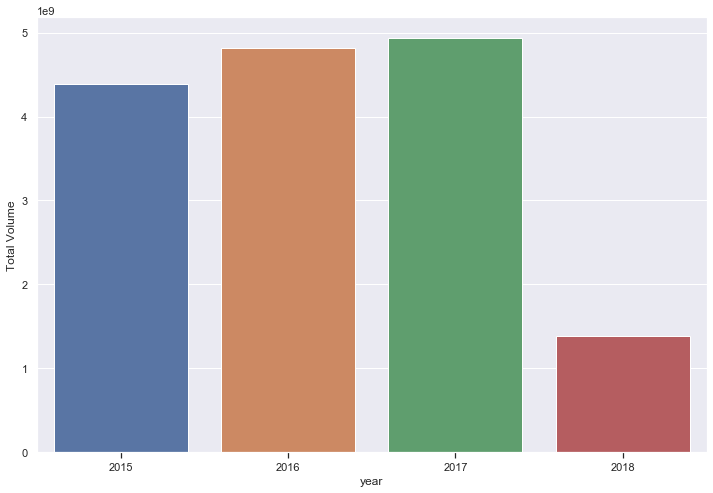

In [79]:
avocado_by_year = avocados_data[['Total Volume','year']].groupby(['year']).sum()
sns.barplot(x=avocado_by_year.index, y= avocado_by_year['Total Volume']);

In [80]:
avocados_organic_US=avocados_organic[avocados_organic.region=='TotalUS']
avocados_conventional_US=avocados_conventional[avocados_conventional.region=='TotalUS']

[Text(0, 0.5, 'Diffrence ,$'), Text(0.5, 0, 'Year')]

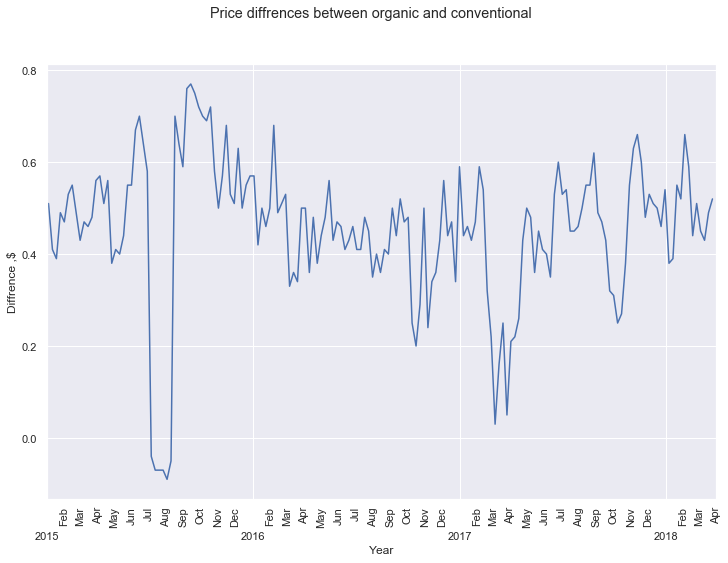

In [81]:
sns.set(rc={'figure.figsize':(12,8)})
fig8, ax8 = plt.subplots()
sns.lineplot(x=pd.to_datetime(avocados_organic_US['Date']), y=avocados_organic_US.AveragePrice-avocados_conventional_US.AveragePrice)

datemin_organic = np.datetime64(pd.to_datetime(avocados_organic_US['Date']).min(), 'Y')
datemax_organic = np.datetime64(pd.to_datetime(avocados_organic_US['Date']).max(), 'Y') + np.timedelta64(3, 'M')
ax8.set_xlim(datemin_organic, datemax_organic)

set_default_locators(ax8)



st = fig8.suptitle('Price diffrences between organic and conventional')
plt.setp(ax8.xaxis.get_minorticklabels(), rotation=90)
plt.rcParams['xtick.bottom'] = True
ax8.set(xlabel='Year', ylabel='Diffrence ,$')


In [82]:
#Notes:
#    2015-Jul to 2015-Sept organic is cheaper, than conventional, but all the other times, cconventional is more expensive


[Text(0, 0.5, 'Average Price ,$'), Text(0.5, 0, 'Year')]

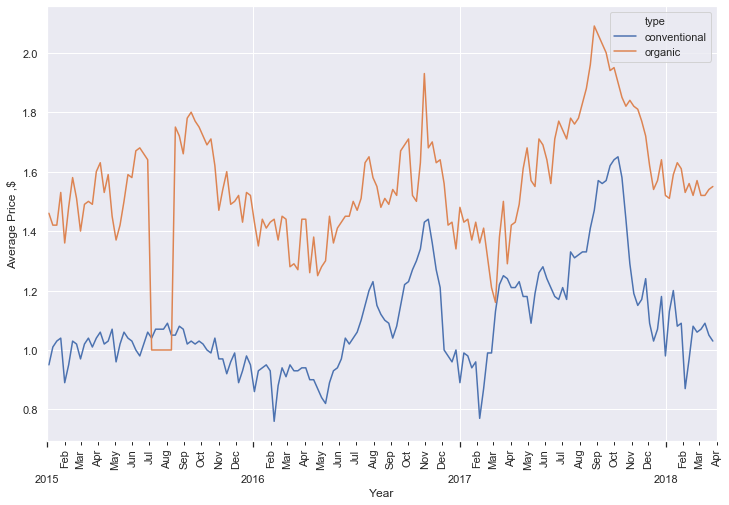

In [83]:
fig9, ax9 = plt.subplots()

sns.lineplot(x=pd.to_datetime(avocados_data[avocados_data.region=='TotalUS']['Date']), y=avocados_data[avocados_data.region=='TotalUS']['AveragePrice'], hue=avocados_data[avocados_data.region=='TotalUS'].type)

ax9.set_xlim(datemin, datemax)


set_default_locators(ax9)
plt.setp(ax9.xaxis.get_minorticklabels(), rotation=90)
plt.rcParams['xtick.bottom'] = True
ax9.set(xlabel='Year', ylabel='Average Price ,$')    

In [84]:
#Notes:
#    2015-Jul to 2015-Sept average price 1$ probably invalid data

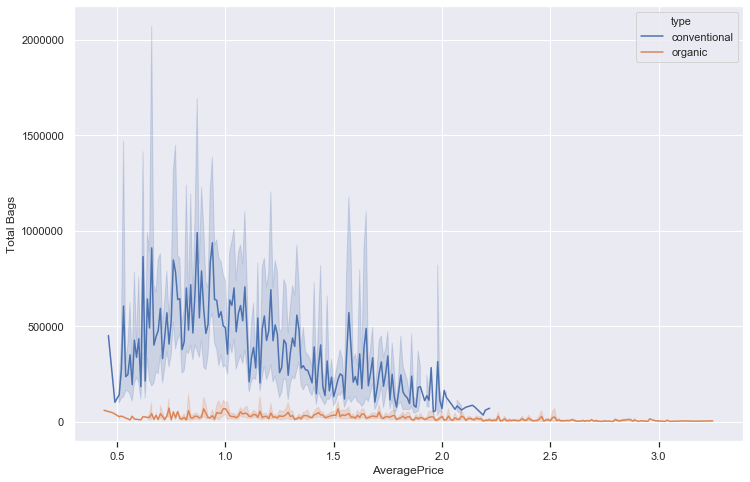

In [85]:
sns.lineplot(x=avocados_data['AveragePrice'], y=avocados_data['Total Bags'], hue=avocados_data.type )

In [86]:
#Notes:
#    Biggest sales, wasn't, when the price was cheapest.
#    Probably, because the popularity of avocados wasnt that high

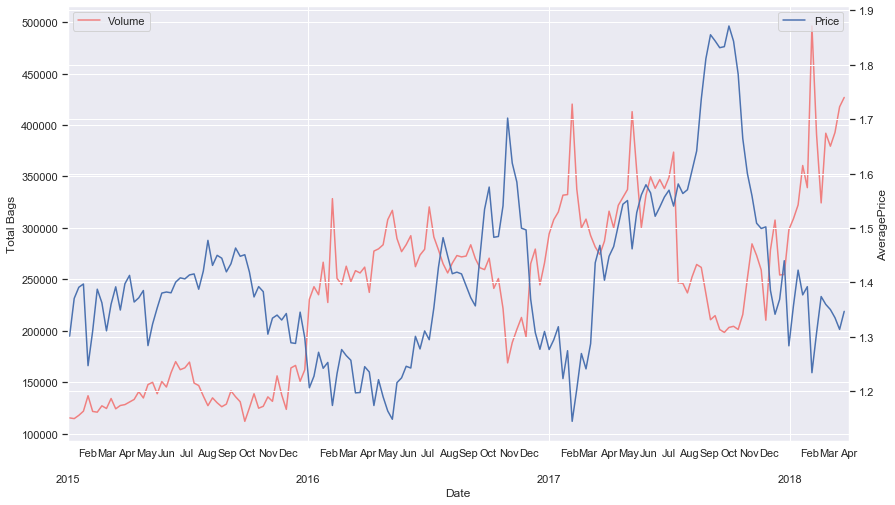

In [87]:
sns.set(rc={'figure.figsize':(14,8)})
fig12, ax12 = plt.subplots()
sns.lineplot(x=pd.to_datetime(avocados_data['Date']), y=avocados_data['Total Bags'],color="lightcoral", label='Volume',ci=None)
ax12 = plt.twinx()
sns.lineplot(x=pd.to_datetime(avocados_data['Date']), y=avocados_data['AveragePrice'], label='Price',ci=None)

ax12.set_xlim(datemin, datemax)

set_default_locators(ax12)
plt.setp(ax12.xaxis.get_minorticklabels(), rotation=90)
plt.rcParams['xtick.bottom'] = True

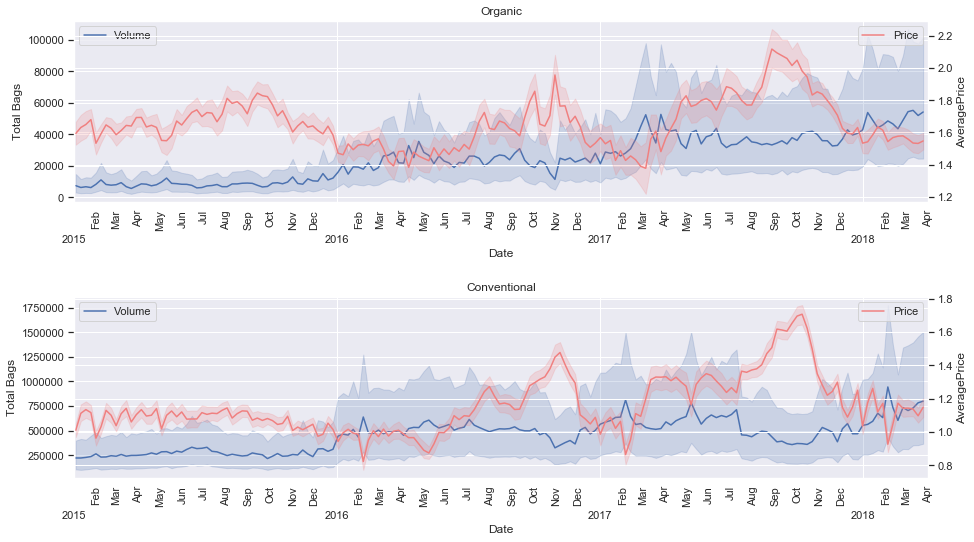

In [92]:
sns.set(rc={'figure.figsize':(14,8)})
fig12, ax12 = plt.subplots(2)
sns.lineplot(x=pd.to_datetime(avocados_data[avocados_data.type=='organic']['Date']), y=avocados_data[avocados_data.type=='organic']['Total Bags'], label='Volume', ax=ax12[0])
ax11= ax12[0].twinx()
sns.lineplot(x=pd.to_datetime(avocados_data[avocados_data.type=='organic']['Date']), y=avocados_data[avocados_data.type=='organic']['AveragePrice'], label='Price',color="lightcoral", ax=ax11)

sns.lineplot(x=pd.to_datetime(avocados_data[avocados_data.type=='conventional']['Date']), y=avocados_data[avocados_data.type=='conventional']['Total Bags'], label='Volume', ax=ax12[1])
ax13= ax12[1].twinx()
sns.lineplot(x=pd.to_datetime(avocados_data[avocados_data.type=='conventional']['Date']), y=avocados_data[avocados_data.type=='conventional']['AveragePrice'], label='Price',color="lightcoral", ax=ax13)

ax12[0].set_xlim(datemin, datemax)
ax12[1].set_xlim(datemin, datemax)
ax11.legend(loc=0)
ax13.legend(loc=0)
ax12[0].legend(loc=2)
ax12[1].legend(loc=2)

set_default_locators(ax12[0])
set_default_locators(ax12[1])
ax12[0].set(title='Organic')
ax12[1].set(title='Conventional')

plt.setp(ax12[0].xaxis.get_minorticklabels(), rotation=90)
plt.setp(ax12[1].xaxis.get_minorticklabels(), rotation=90)
plt.rcParams['xtick.bottom'] = True
fig12.tight_layout(pad=2)

In [89]:
#Notes
#  Like you would expect, the amount sold, depends on price, but overall, amount sold increases with time
#

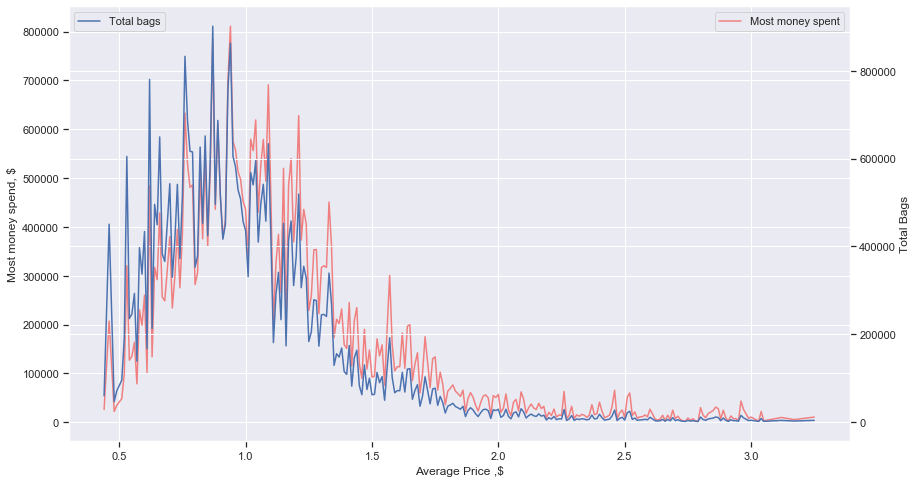

In [90]:
ax13=sns.lineplot(x=avocados_data['AveragePrice'], y=avocados_data['MostMoney'],color="lightcoral", label='Most money spent',ci=None)
ax13.set(xlabel='Average Price ,$', ylabel='Most money spend, $') 
ax14 = ax13.twinx()
ax14=sns.lineplot(x=avocados_data['AveragePrice'], y=avocados_data['Total Bags'],label= 'Total bags', ci=None)
ax13.legend(loc=0)
ax14.legend(loc=2)

In [91]:
#Notes
#    It's way more profitable to sell avocados, for more than 1$
#